# **STUDENT RESULT ANALYSIS**

In [3]:
#Importing the important libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
#Read the file and display the five records
df = pd.read_csv("O:/Projects/Students Result Analysis/Expanded_data_with_more_features.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


Data Cleaning

In [5]:
#Findout how columns has null values and null values counts
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [6]:
#Drop the Unnamed: 0 column
df=df.drop(["Unnamed: 0"], axis=1)

df.head()

Gender Distribution

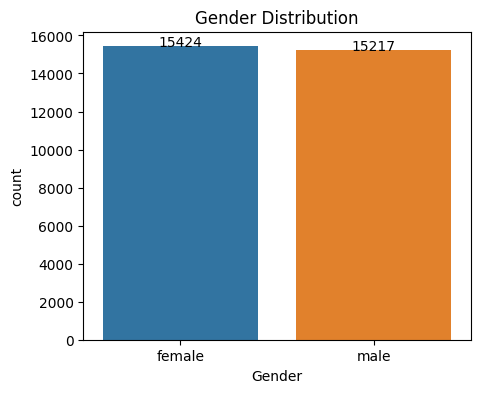

In [8]:
#Plot the gender distribution
plt.figure(figsize=(5, 4))
ax = sns.countplot(x='Gender', data=df)

# Get the counts for each category
counts = df['Gender'].value_counts()

# Loop through each category and annotate the count on top of the bar
for i, count in enumerate(counts):
    ax.text(i, count + 0.1, str(count), ha='center')

plt.title("Gender Distribution")
plt.show()

From the plot we have analysed that the number of female is slightly more than number of male

Compare the performance of male and female students in MathScore, ReadingScore, and WritingScore

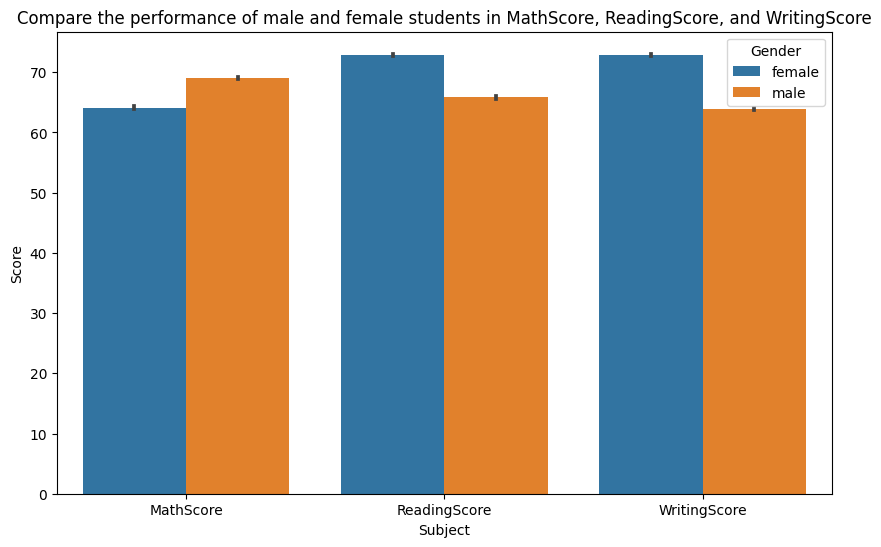

In [9]:
# Melt the DataFrame to long format
melted_df = pd.melt(df, id_vars='Gender' , value_vars=['MathScore', 'ReadingScore', 'WritingScore'], var_name='Subject', value_name='Score') 

#Plot the performance of male and female students 
plt.figure(figsize=(10, 6))
sns.barplot(x='Subject', y='Score', hue='Gender', data=melted_df)
plt.title("Compare the performance of male and female students in MathScore, ReadingScore, and WritingScore")

plt.show()

In [10]:
#Use the melt() function to transfrom or reshape the data, similar to pivot table
melted_df

,Gender,Subject,Score
0,female,MathScore,71
1,female,MathScore,69
2,female,MathScore,87
3,male,MathScore,45
4,male,MathScore,76
...,...,...,...
91918,female,WritingScore,65
91919,male,WritingScore,51
91920,female,WritingScore,67
91921,female,WritingScore,93


From above plot We can see that in math test score male parfomace is slightly better than female but in reading test score and Writing test score female parfomace is better than male parfomace

The impact of weekly self study of students on the different scores

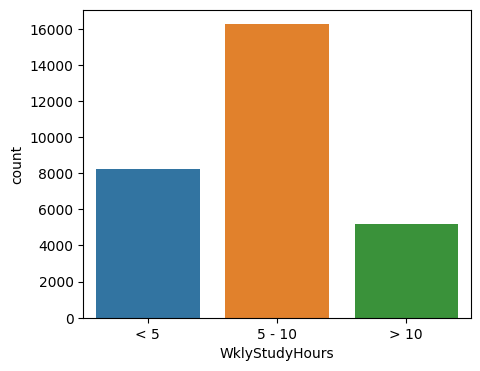

In [11]:
#Differences between students who study less than 5 hours, 5 to 10 hours and more than 10 hours

plt.figure(figsize=(5, 4))
sns.countplot(x='WklyStudyHours', data=df)
plt.show()

We can see that most of the students study atleast 5 to 10 hours

In [12]:
#Here's we groupby the student's weekly self study with the math test score, reading test score and Writing test score to find average as groups
gb=df.groupby("WklyStudyHours").agg({"MathScore":"mean", "ReadingScore":"mean","WritingScore": "mean"})
gb

,MathScore,ReadingScore,WritingScore
WklyStudyHours,,,
5 - 10,66.870491,69.660532,68.636280
< 5,64.580359,68.176135,67.090192
> 10,68.696655,70.365436,69.777778


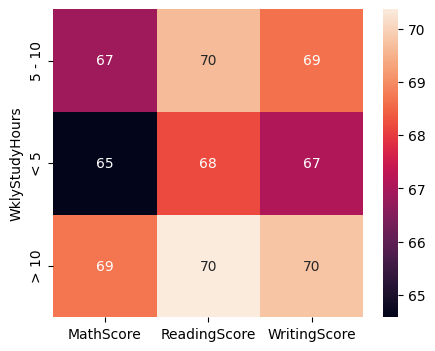

In [13]:
#Plot relationship between weekly self study and student's score
plt.figure(figsize=(5, 4))
sns.heatmap(gb,annot=True)
plt.show()

From the above plot we can see that weekly self study does give impact on the student's scores

the student parctice sport 

In [14]:
parcticesp=df["PracticeSport"].value_counts()
parcticesp

PracticeSport
sometimes    15213
regularly    10793
never         4004
Name: count, dtype: int64

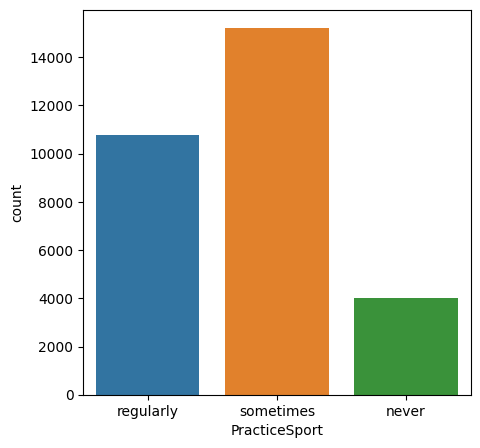

In [37]:
#Plot How often the student parctice sport 

plt.figure(figsize=(5,5))
sns.countplot(x='PracticeSport', data=df)
plt.show()

We can see that there any impact on the study after practice sports

In [38]:
#Here's we groupby the practice sports with the student's math test score, reading test score and Writing test score to find average as groups
gb2=df.groupby("PracticeSport").agg({"MathScore":"mean", "WritingScore":"mean","ReadingScore":"mean"})
gb2

,MathScore,WritingScore,ReadingScore
PracticeSport,,,
never,64.171079,66.522727,68.337662
regularly,67.839155,69.604003,69.943019
sometimes,66.274831,68.072438,69.241307


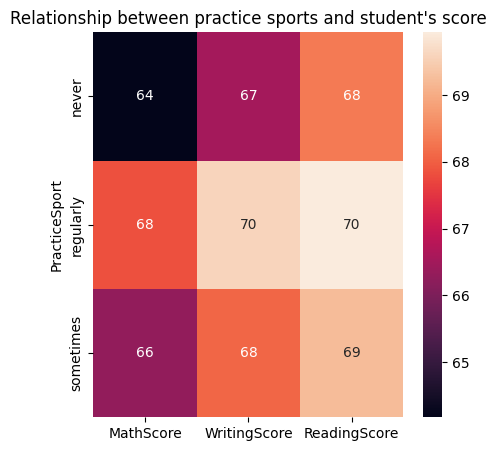

In [39]:
#Plot the relation that playing sports have impact on student's score

plt.figure(figsize=(5,5))
sns.heatmap(gb2,annot=True)
plt.title("Relationship between practice sports and student's score")
plt.show()


We can see that students who regularly play sports they are academic scores quite good

The impact of parental education on the Kids' scores

In [22]:
#Here's we groupby the parents education with the student's math test score, reading test score and Writing test score to find average as groups

gb1=df.groupby('ParentEduc').agg({"MathScore":"mean", "WritingScore":"mean","ReadingScore":"mean"})
gb1

,MathScore,WritingScore,ReadingScore
ParentEduc,,,
associate's degree,68.365586,70.299099,71.124324
bachelor's degree,70.466627,73.331069,73.062020
high school,64.435731,65.421136,67.213997
master's degree,72.336134,76.356896,75.832921
some college,66.390472,68.501432,69.179708
some high school,62.584013,63.632409,65.510785


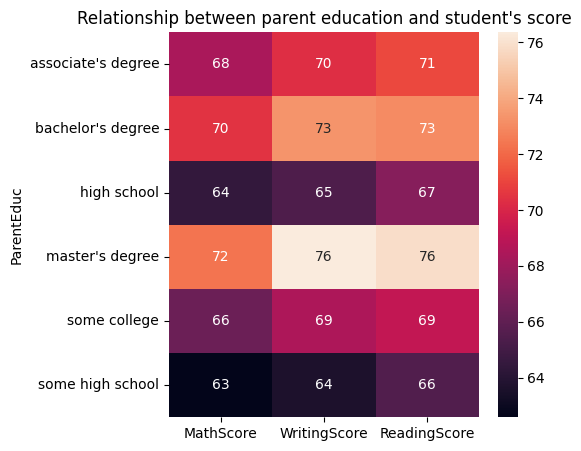

In [25]:
#Plot the relationship between parent education and student's score
plt.figure(figsize=(5,5))
sns.heatmap(gb1,annot=True)
plt.title("Relationship between parent education and student's score")
plt.show()

School lunch type

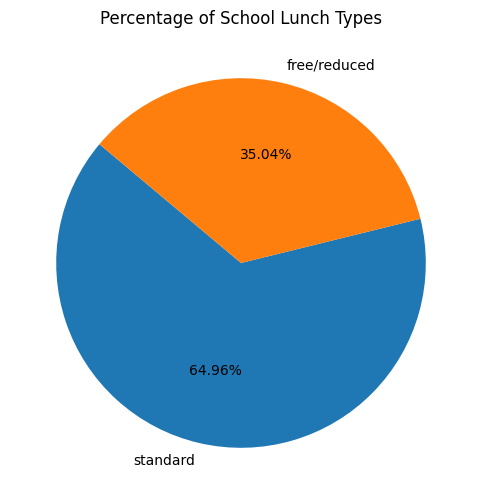

In [44]:
#Plot persentage school lunch type
lunch_counts = df['LunchType'].value_counts()

ltype=["standard","free/reduced"]

plt.figure(figsize=(6, 6))
plt.pie(lunch_counts,labels=ltype,autopct="%1.2f%%")
plt.title('Percentage of School Lunch Types')
plt.show()

Dectect Outlier

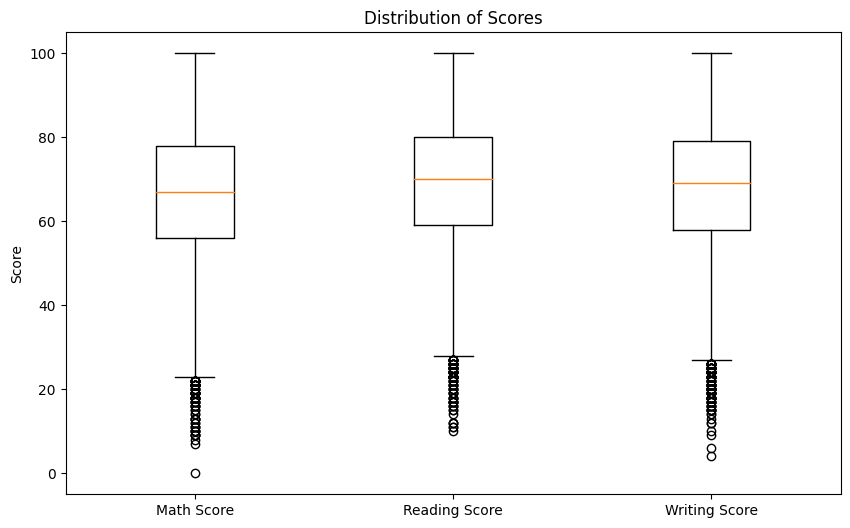

In [48]:
# Extracting scores from the DataFrame
math_scores = df["MathScore"]
reading_scores = df["ReadingScore"]
writing_scores = df["WritingScore"]

# Combining scores into a list
scores = [math_scores, reading_scores, writing_scores]

# Plotting the boxplot

plt.figure(figsize=(10, 6))
plt.boxplot(scores, labels=["Math Score", "Reading Score", "Writing Score"])
plt.title("Distribution of Scores")
plt.ylabel("Score")
plt.show()

We see that Math Score has more outliers than Reading Score , writing Score 
So, as par analysis students need to give a more attention on mathematics

Distribution of Ethnic Groups

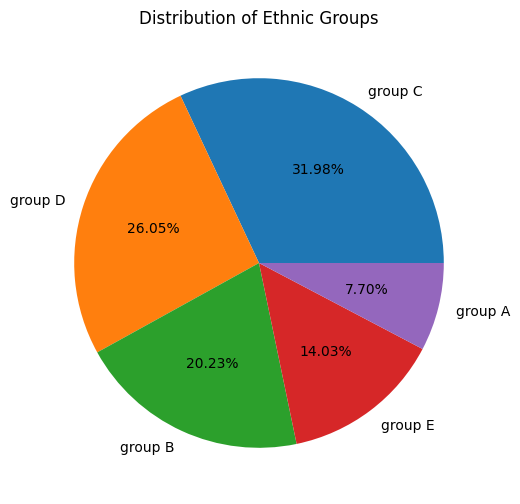

In [19]:
# store the counts of each ethnic group
group_counts = df['EthnicGroup'].value_counts()

# Create the pie chart
plt.figure(figsize=(10, 6))
plt.pie(group_counts, labels=group_counts.index, autopct='%1.2f%%')
plt.title("Distribution of Ethnic Groups")
plt.show()